In [1]:
import pandas as  pd
import numpy as np
import warnings 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# 设置数据集路径

dataset_path = './data/'

In [4]:
# 读取数据

data_balance = pd.read_csv(dataset_path+'user_balance_table.csv')
users = pd.read_csv(dataset_path+'user_profile_table.csv')
mfd_bank = pd.read_csv(dataset_path+'mfd_bank_shibor.csv')
share = pd.read_csv(dataset_path+'mfd_day_share_interest.csv')

In [5]:
data_balance.head(10)

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   
5        1     20140820     20415     20413                   2   
6        1     20140823     20421     20419                   2   
7        1     20140826     20427     20425                   2   
8        1     20140829     20433     20431                   2   
9        1     20140830     20435     20433                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   
5                    0                 0                  0                 0   
6                    0                 0                  0                 0   
7                    0                 0                  0                 0   
8                    0                 0                  0                 0   
9                    0                 0                  0                 0   

   consume_amt  transfer_amt  tftobal_amt  tftocard_amt  share_amt  category1  \
0            0             0            0             0          2        NaN   
1            0             0            0             0          2        NaN   
2            0             0            0             0          2        NaN   
3            0             0            0             0          2        NaN   
4            0             0            0             0          2        NaN   
5            0             0            0             0          2        NaN   
6            0             0            0             0          2        NaN   
7            0             0            0             0          2        NaN   
8            0             0            0             0          2        NaN   
9            0             0            0             0          2        NaN   

   category2  category3  category4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  
5        NaN        NaN        NaN  
6        NaN        NaN        NaN  
7        NaN        NaN        NaN  
8        NaN        NaN        NaN  
9        NaN        NaN        NaN

In [6]:
users.head(10)

user_id  sex     city constellation
0        2    1  6411949           狮子座
1       12    1  6412149           摩羯座
2       22    1  6411949           双子座
3       23    1  6411949           双鱼座
4       25    1  6481949           双鱼座
5       26    1  6281949           双子座
6       34    0  6481949           摩羯座
7       36    1  6281949           天秤座
8       42    0  6281949           水瓶座
9       47    1  6412149           天蝎座

In [7]:
mfd_bank.head(10)

mfd_date  Interest_O_N  Interest_1_W  Interest_2_W  Interest_1_M  \
0  20130701        4.4560         5.423         6.040        6.8800   
1  20130702        3.7860         4.750         5.074        5.8000   
2  20130703        3.4000         4.242         4.658        5.2000   
3  20130704        3.3480         3.938         4.464        5.1020   
4  20130705        3.3800         3.816         4.295        4.7885   
5  20130708        3.2560         3.656         3.686        4.3000   
6  20130709        3.2490         3.596         3.604        4.2980   
7  20130710        3.2510         3.590         3.850        4.2690   
8  20130711        3.3547         3.810         3.906        4.3510   
9  20130712        3.3000         3.800         3.928        4.1280   

   Interest_3_M  Interest_6_M  Interest_9_M  Interest_1_Y  
0        5.2950        4.2390        4.2820        4.4125  
1        5.2110        4.2344        4.2808        4.4070  
2        5.1480        4.2300        4.2796        4.4022  
3        5.0290        4.2287        4.2776        4.4000  
4        4.9390        4.2273        4.2749        4.4000  
5        4.7940        4.2238        4.2741        4.4000  
6        4.7230        4.2215        4.2720        4.4000  
7        4.7040        4.2200        4.2707        4.4000  
8        4.6955        4.2199        4.2705        4.4000  
9        4.6910        4.2189        4.2704        4.4000

In [8]:
mfd_bank.tail(10)

mfd_date  Interest_O_N  Interest_1_W  Interest_2_W  Interest_1_M  \
284  20140818         2.858         3.276        3.5100        4.3100   
285  20140819         2.835         3.237        3.4770        4.3630   
286  20140820         2.833         3.246        3.4620        4.2860   
287  20140821         2.848         3.312        3.9800        4.2380   
288  20140822         2.843         3.369        3.9420        4.2039   
289  20140825         2.841         3.363        3.8860        4.1990   
290  20140826         2.823         3.318        3.8760        4.2000   
291  20140827         2.861         3.349        3.9828        4.1780   
292  20140828         2.876         3.538        4.0500        4.1330   
293  20140829         2.908         3.672        4.1990        4.1140   

     Interest_3_M  Interest_6_M  Interest_9_M  Interest_1_Y  
284        4.6805        4.8810        4.9382           5.0  
285        4.6791        4.8801        4.9382           5.0  
286        4.6804        4.8800        4.9390           5.0  
287        4.6786        4.8800        4.9400           5.0  
288        4.6764        4.8800        4.9398           5.0  
289        4.6758        4.8800        4.9394           5.0  
290        4.6695        4.8730        4.9363           5.0  
291        4.6680        4.8729        4.9365           5.0  
292        4.6689        4.8727        4.9373           5.0  
293        4.6659        4.8726        4.9364           5.0

In [9]:
share.head(10)

mfd_date  mfd_daily_yield  mfd_7daily_yield
0  20130701           1.5787             6.307
1  20130702           1.5461             6.174
2  20130703           1.4670             6.034
3  20130704           1.4223             5.903
4  20130705           1.3845             5.739
5  20130706           1.3674             5.582
6  20130707           1.3671             5.425
7  20130708           1.3129             5.279
8  20130709           1.3096             5.150
9  20130710           1.2792             5.047

In [10]:
share.tail(10)

mfd_date  mfd_daily_yield  mfd_7daily_yield
417  20140822           1.1040             4.153
418  20140823           1.0997             4.146
419  20140824           1.0993             4.139
420  20140825           1.1122             4.139
421  20140826           1.1085             4.131
422  20140827           1.1079             4.123
423  20140828           1.1043             4.116
424  20140829           1.1169             4.123
425  20140830           1.1206             4.134
426  20140831           1.1204             4.146

In [11]:
# 为data_balance数据集添加时间戳

data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday

# 总金额
total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance.reset_index(inplace=True)

# 为total_blance数据集添加时间戳
total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

## 一、时间序列分析

In [12]:
# 聚合时间数据

total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()

In [13]:
# 生成测试集区段数据

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

In [14]:
# 拼接数据集

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [15]:
# 为数据集添加时间戳

total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

In [16]:
import matplotlib.pylab as plt

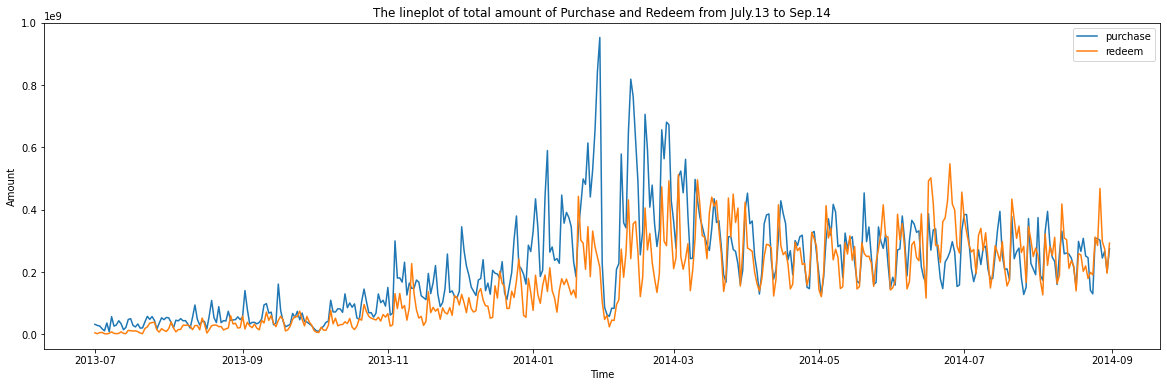

In [17]:
# 画出每日总购买与赎回量的时间序列图

fig = plt.figure(figsize=(20,6))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

No handles with labels found to put in legend.


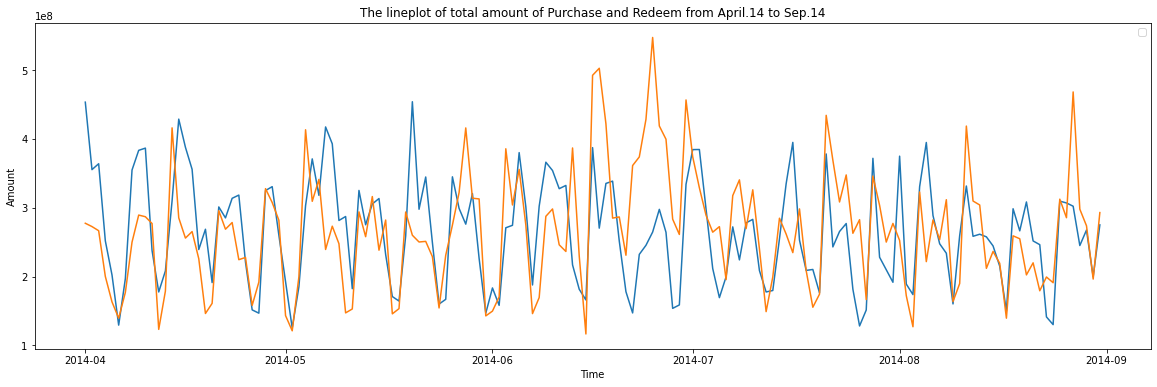

In [18]:
# 画出4月份以后的时间序列图

total_balance_1 = total_balance[total_balance['date'] >= datetime.datetime(2014,4,1)]
fig = plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'])
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'])
plt.legend()
plt.title("The lineplot of total amount of Purchase and Redeem from April.14 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


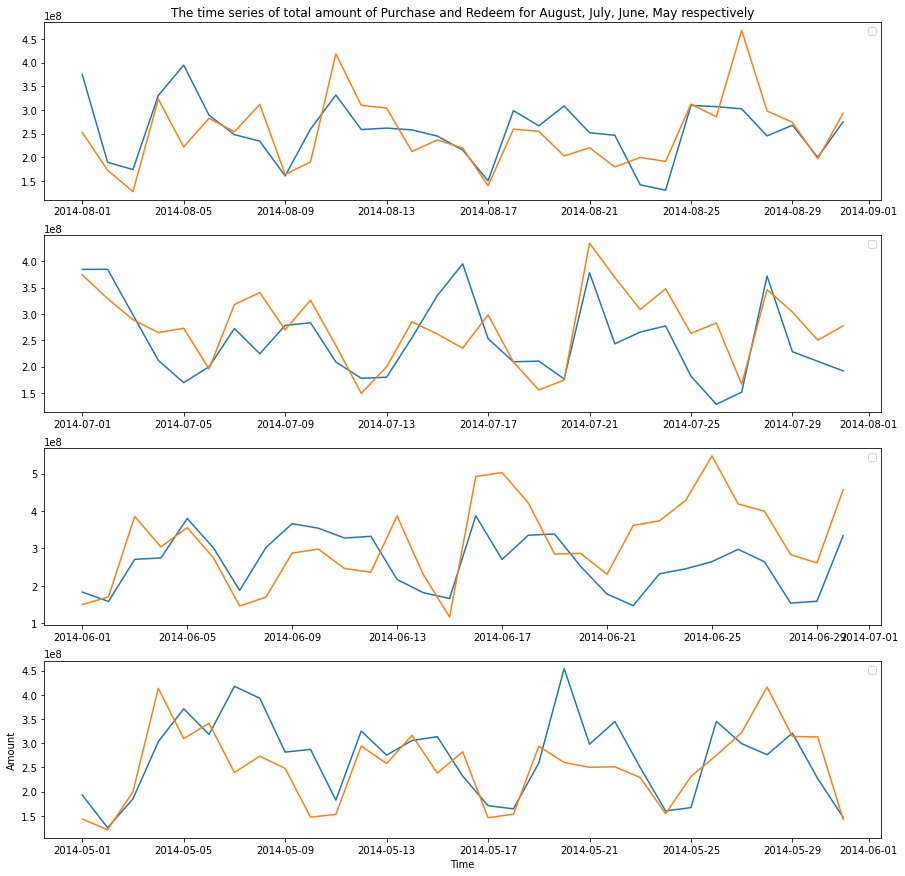

In [19]:
# 分别画出每个月中每天购买赎回量的时间序列图

fig = plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.title("The time series of total amount of Purchase and Redeem for August, July, June, May respectively")

total_balance_2 = total_balance[total_balance['date'] >= datetime.datetime(2014,8,1)]
plt.plot(total_balance_2['date'], total_balance_2['total_purchase_amt'])
plt.plot(total_balance_2['date'], total_balance_2['total_redeem_amt'])
plt.legend()


total_balance_3 = total_balance[(total_balance['date'] >= datetime.datetime(2014,7,1)) & (total_balance['date'] < datetime.datetime(2014,8,1))]
plt.subplot(4,1,2)
plt.plot(total_balance_3['date'], total_balance_3['total_purchase_amt'])
plt.plot(total_balance_3['date'], total_balance_3['total_redeem_amt'])
plt.legend()


total_balance_4 = total_balance[(total_balance['date'] >= datetime.datetime(2014,6,1)) & (total_balance['date'] < datetime.datetime(2014,7,1))]
plt.subplot(4,1,3)
plt.plot(total_balance_4['date'], total_balance_4['total_purchase_amt'])
plt.plot(total_balance_4['date'], total_balance_4['total_redeem_amt'])
plt.legend()


total_balance_5 = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,1)) & (total_balance['date'] < datetime.datetime(2014,6,1))]
plt.subplot(4,1,4)
plt.plot(total_balance_5['date'], total_balance_5['total_purchase_amt'])
plt.plot(total_balance_5['date'], total_balance_5['total_redeem_amt'])
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


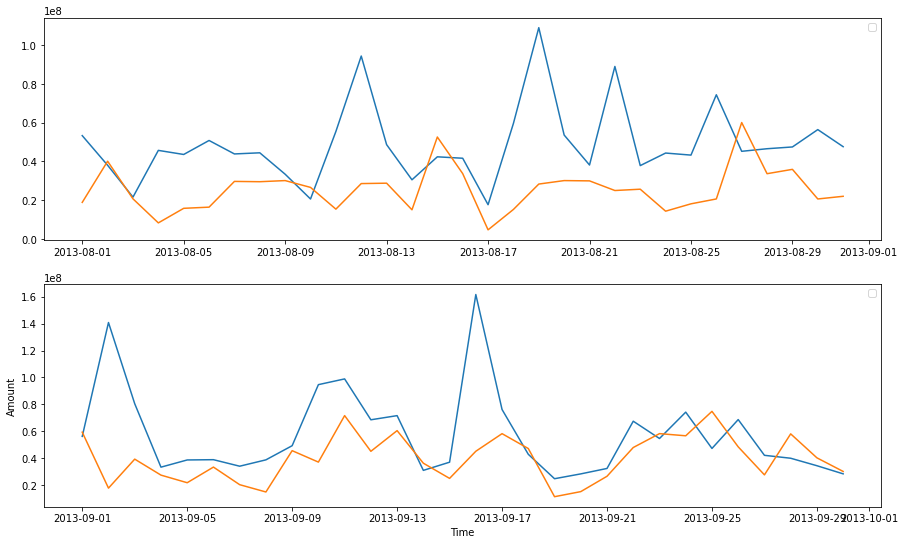

In [20]:
# 分别画出13年8月与9月每日购买赎回量的时序图

fig = plt.figure(figsize=(15,9))

total_balance_last8 = total_balance[(total_balance['date'] >= datetime.datetime(2013,8,1)) & (total_balance['date'] < datetime.datetime(2013,9,1))]
plt.subplot(2,1,1)
plt.plot(total_balance_last8['date'], total_balance_last8['total_purchase_amt'])
plt.plot(total_balance_last8['date'], total_balance_last8['total_redeem_amt'])
plt.legend()

total_balance_last9 = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,1)) & (total_balance['date'] < datetime.datetime(2013,10,1))]
plt.subplot(2,1,2)
plt.plot(total_balance_last9['date'], total_balance_last9['total_purchase_amt'])
plt.plot(total_balance_last9['date'], total_balance_last9['total_redeem_amt'])
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## 二、翌日特征分析

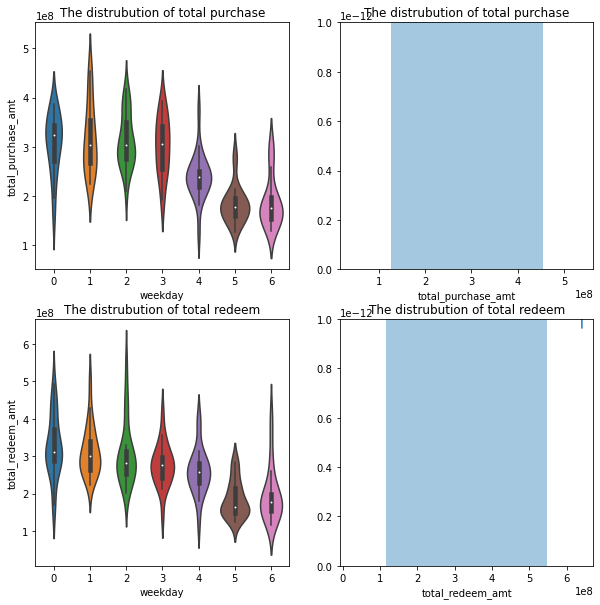

In [21]:
# 画出每个翌日的数据分布于整体数据的分布图

a = plt.figure(figsize=(10,10))
scatter_para = {'marker':'.', 's':3, 'alpha':0.3}
line_kws = {'color':'k'}
plt.subplot(2,2,1)
plt.title('The distrubution of total purchase')
sns.violinplot(x='weekday', y='total_purchase_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,2)
plt.title('The distrubution of total purchase')
sns.distplot(total_balance_1['total_purchase_amt'].dropna())
plt.subplot(2,2,3)
plt.title('The distrubution of total redeem')
sns.violinplot(x='weekday', y='total_redeem_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,4)
plt.title('The distrubution of total redeem')
sns.distplot(total_balance_1['total_redeem_amt'].dropna())

In [22]:
# 按翌日对数据聚合后取均值

week_sta = total_balance_1[['total_purchase_amt', 'total_redeem_amt', 'weekday']].groupby('weekday', as_index=False).mean()

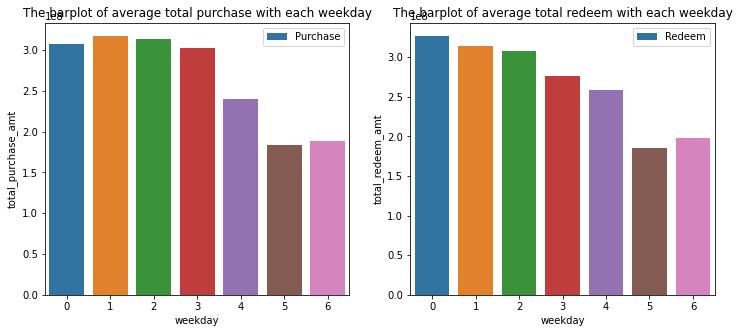

In [23]:
# 分析翌日的中位数特征

plt.figure(figsize=(12, 5))
ax = plt.subplot(1,2,1)
plt.title('The barplot of average total purchase with each weekday')
ax = sns.barplot(x="weekday", y="total_purchase_amt", data=week_sta, label='Purchase')
ax.legend()
ax = plt.subplot(1,2,2)
plt.title('The barplot of average total redeem with each weekday')
ax = sns.barplot(x="weekday", y="total_redeem_amt", data=week_sta, label='Redeem')
ax.legend()

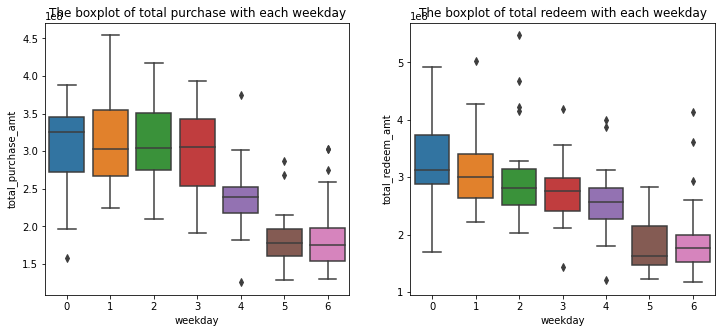

In [24]:
# 画出翌日的箱型图

plt.figure(figsize=(12, 5))
ax = plt.subplot(1,2,1)
plt.title('The boxplot of total purchase with each weekday')
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=total_balance_1)
ax = plt.subplot(1,2,2)
plt.title('The boxplot of total redeem with each weekday')
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=total_balance_1)

In [25]:
# 使用OneHot方法将翌日特征划分，获取划分后特征

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
total_balance = total_balance.reset_index()
week_feature = encoder.fit_transform(np.array(total_balance['weekday']).reshape(-1, 1)).toarray()
week_feature = pd.DataFrame(week_feature,columns=['weekday_onehot']*len(week_feature[0]))
feature = pd.concat([total_balance, week_feature], axis = 1)[['total_purchase_amt', 'total_redeem_amt','weekday_onehot','date']]
feature.columns = list(feature.columns[0:2]) + [x+str(i) for i,x in enumerate(feature.columns[2:-1])] + ['date']

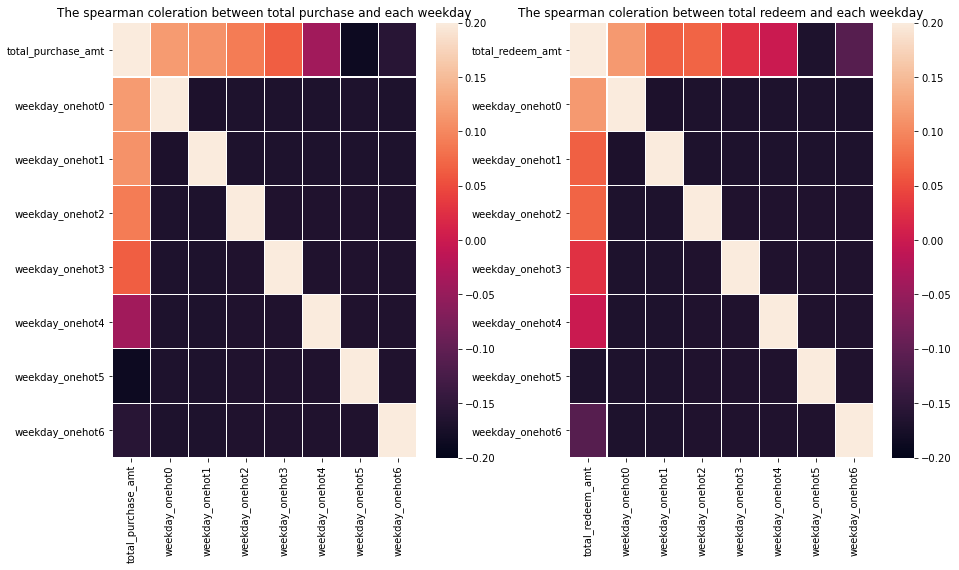

In [26]:
# 画出划分后翌日特征与标签的斯皮尔曼相关性

f, ax = plt.subplots(figsize = (15, 8))
plt.subplot(1,2,1)
plt.title('The spearman coleration between total purchase and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman'),linewidths = 0.1, vmax = 0.2, vmin=-0.2)
plt.subplot(1,2,2)
plt.title('The spearman coleration between total redeem and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman'),linewidths = 0.1,  vmax = 0.2, vmin=-0.2)

In [27]:
# -*- coding:utf-8 -*-
# writen by ChuanyuXue

import numpy

class mvtest:
    def __init__(self):
        self._n = None
        self._m = None
        self.quantiles = [
            [0.1178, 0.2091, 0.2442, 0.2860, 0.3469, 0.4665, 0.4968, 0.5416, 0.5984, 0.7120],
            [0.2773, 0.4227, 0.4631, 0.5220, 0.6086, 0.7365, 0.7776, 0.8377, 0.9278, 1.0673],
            [0.4385, 0.6231, 0.6761, 0.7495, 0.8384, 0.9938, 1.0453, 1.1055, 1.2090, 1.3393],
            [0.6028, 0.8158, 0.8737, 0.9519, 1.0602, 1.2399, 1.2911, 1.3622, 1.4408, 1.6026],
            [0.7694, 1.0097, 1.0786, 1.1670, 1.2698, 1.4440, 1.4955, 1.5776, 1.6992, 1.8650],
            [0.9423, 1.2035, 1.2757, 1.3627, 1.4927, 1.6986, 1.7672, 1.8268, 1.9691, 2.1241],
            [1.0971, 1.3787, 1.4569, 1.5549, 1.6780, 1.8901, 1.9581, 2.0594, 2.1693, 2.3645],
            [1.2708, 1.5774, 1.6674, 1.7672, 1.8963, 2.1096, 2.1742, 2.2597, 2.3809, 2.6180],
            [1.4468, 1.7812, 1.8707, 1.9773, 2.1019, 2.3362, 2.4081, 2.5011, 2.6215, 2.7943]
        ]
        self.prob = [0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]

    def _f(self, s, x):
        return len(x[x <= s]) / self._n

    def _fr(self, s, t, x, y):
        return len(x[(x <= s) & (y == t)]) / len(y[y == t])

    def _pr(self, t, y):
        return len(y[y == t]) / self._n

    def _quantiles_transformer(self, result):
        quantiles = self.quantiles[self._m - 2]
        if result < quantiles[0]:
            return [0.50, 1]
        if quantiles[len(quantiles) - 1] <= result:
            return [0, 0.01]
        for i in range(len(quantiles) - 1):
            if quantiles[i] <= result < quantiles[i+1]:
                return [round(1-self.prob[i+1], 2), round(1-self.prob[i], 2)]

    def test(self, x: numpy.ndarray, y: numpy.ndarray)->dict:
        try:
            x = numpy.array(x)
        except Exception:
            raise Exception("The expected type of this argument is Array or List,"
                            " however \"" + str(type(x)) + "\" is gotten.")
        try:
            y = numpy.array(y, dtype=int)
        except Exception:
            raise Exception("The expected type of this argument is Array or List,"
                            " however \"" + str(type(y)) + "\" is gotten.")
        if len(x) == 0 or len(y) == 0:
            raise Exception("The input vectors cannot be empty.")
        if type(x.dtype) == str or type(y.dtype) == str:
            raise Exception("The element type of input vectors cannot be \"str\".")

        self._n = len(x)
        self._m = len(numpy.unique(y))
        if self._m > 10:
            self._m = 10

        if self._n == len(y):
            result = 0
            for t in numpy.unique(y):
                pr = self._pr(t, y)
                for s in x:
                    result += pr * numpy.square(self._fr(s, t, x, y) - self._f(s, x))
            return {'Tn': round(result, 2), 'p-value': self._quantiles_transformer(result)}
        else:
            raise Exception("Two vectors must be equal to the same dimension vector.")

In [28]:
mv = mvtest()
mv.test(total_balance_1['total_purchase_amt'], total_balance_1['weekday'])

{'Tn': 6.75, 'p-value': [0, 0.01]}

## 三、月份特征分析

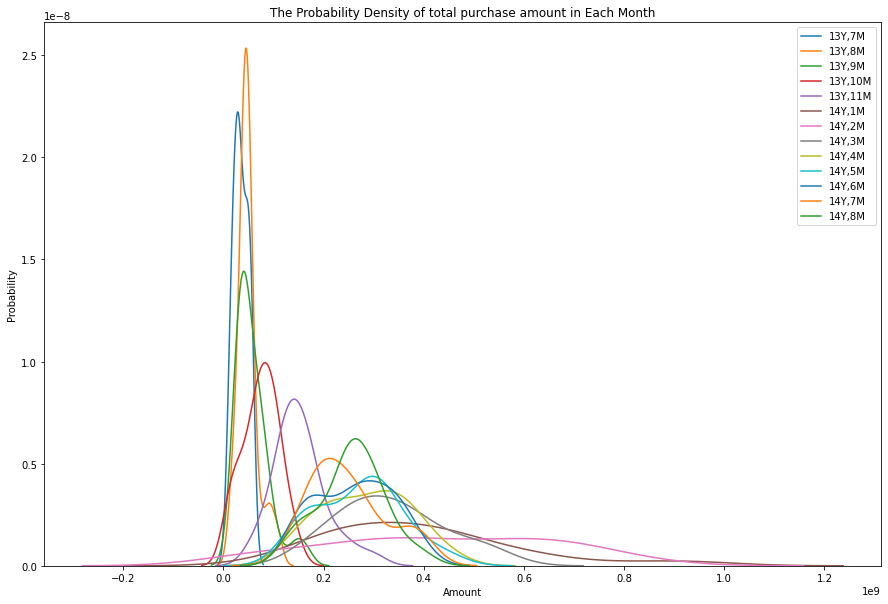

In [29]:
# 画出每个月的购买总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total purchase amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2013,i,1)) & (total_balance['date'] < datetime.datetime(2013,i+1,1))]['total_purchase_amt'],label='13Y,'+str(i)+'M')
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2014,i,1)) & (total_balance['date'] < datetime.datetime(2014,i+1,1))]['total_purchase_amt'],label='14Y,'+str(i)+'M')

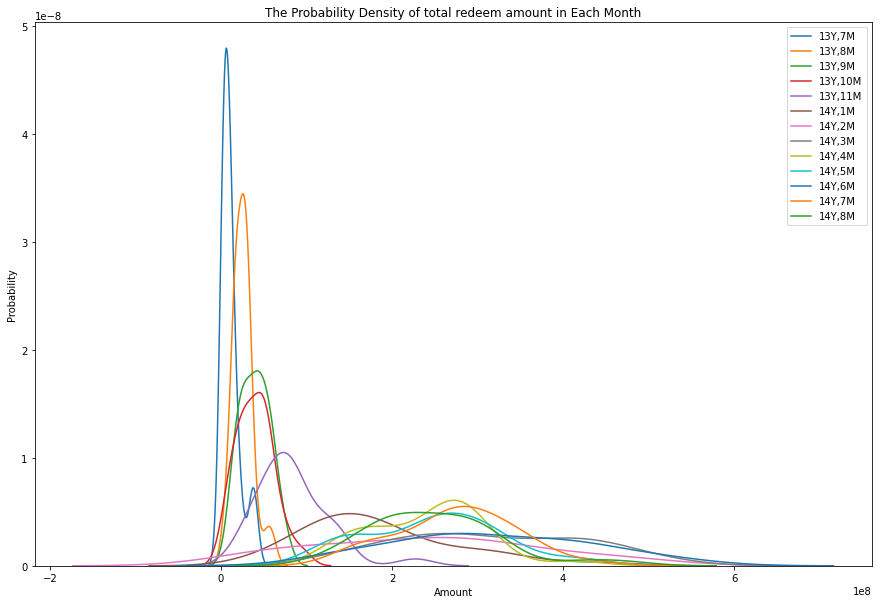

In [30]:
# 画出每个月的赎回总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total redeem amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2013,i,1)) & (total_balance['date'] < datetime.datetime(2013,i+1,1))]['total_redeem_amt'],label='13Y,'+str(i)+'M')
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2014,i,1)) & (total_balance['date'] < datetime.datetime(2014,i+1,1))]['total_redeem_amt'],label='14Y,'+str(i)+'M')

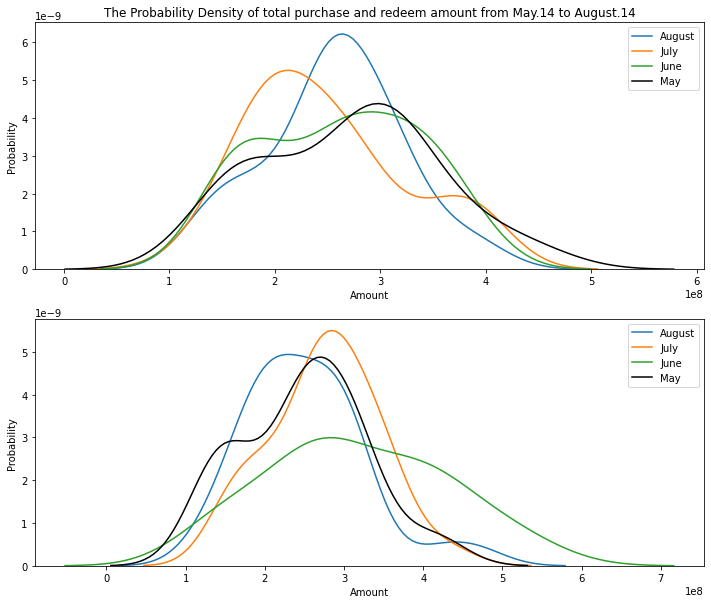

In [31]:
# 画出14年五六七八月份的分布估计图

plt.figure(figsize=(12,10))

ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from May.14 to August.14')
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_3['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_4['total_purchase_amt'],label='June')
ax = sns.kdeplot(total_balance_5['total_purchase_amt'],color='Black',label='May')
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_3['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_4['total_redeem_amt'],label='June')
ax = sns.kdeplot(total_balance_5['total_redeem_amt'],color='Black',label='May')

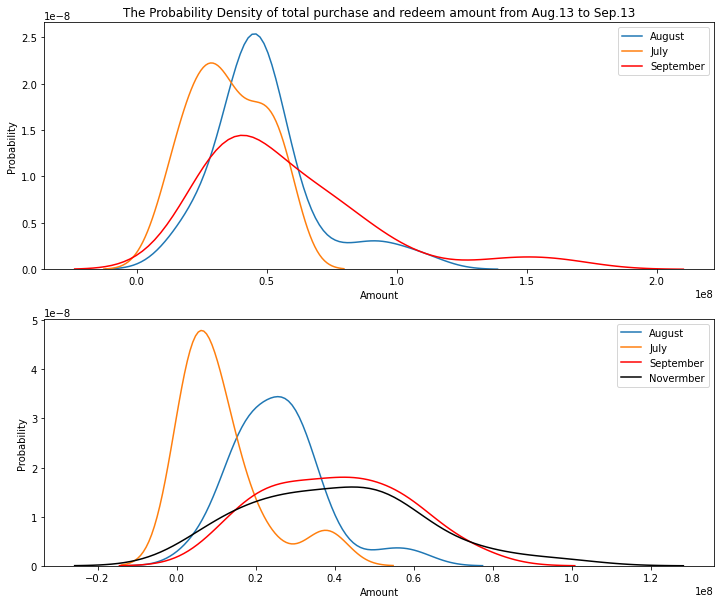

In [32]:
# 画出13年八月到九月份的分布估计图

total_balance_last_7 = total_balance[(total_balance['date'] >= datetime.datetime(2013,7,1)) & (total_balance['date'] < datetime.datetime(2013,8,1))]
total_balance_last_8 = total_balance[(total_balance['date'] >= datetime.datetime(2013,8,1)) & (total_balance['date'] < datetime.datetime(2013,9,1))]
total_balance_last_9 = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,1)) & (total_balance['date'] < datetime.datetime(2013,10,1))]
total_balance_last_10 = total_balance[(total_balance['date'] >= datetime.datetime(2013,10,1)) & (total_balance['date'] < datetime.datetime(2013,11,1))]
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from Aug.13 to Sep.13')
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_purchase_amt'],color='Red',label='September')

ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_redeem_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_redeem_amt'],color='Black',label='Novermber')

## 四、日期特征分析

In [33]:
# 按照每天聚合数据集

day_sta = total_balance_2[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()

Text(0.5, 1.0, 'The total Purchase in Aug.14')

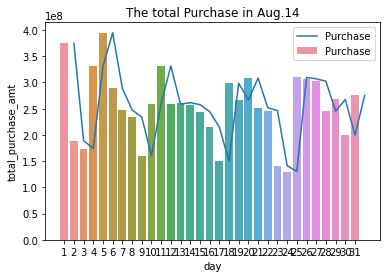

In [34]:
# 获取聚合后每月购买分布的柱状图

ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax.legend()
plt.title("The total Purchase in Aug.14")

Text(0.5, 1.0, 'The total Redeem in Aug.14')

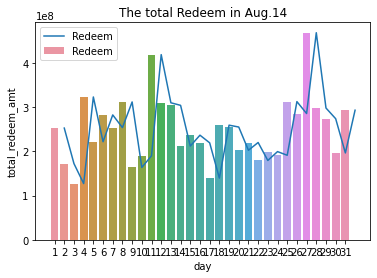

In [35]:
# 获取聚合后每月赎回分布的柱状图

ax = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax.legend()
plt.title("The total Redeem in Aug.14")

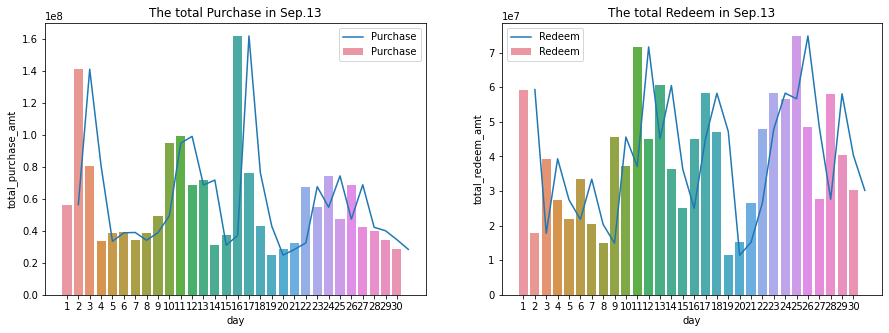

In [36]:
# 画出13年九月份的分布图

plt.figure(figsize=(15,5))
day_sta = total_balance_last_9[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()
plt.subplot(1,2,1)
plt.title("The total Purchase in Sep.13")
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
plt.subplot(1,2,2)
plt.title("The total Redeem in Sep.13")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx.legend()

Text(69.0, 0.5, 'week')

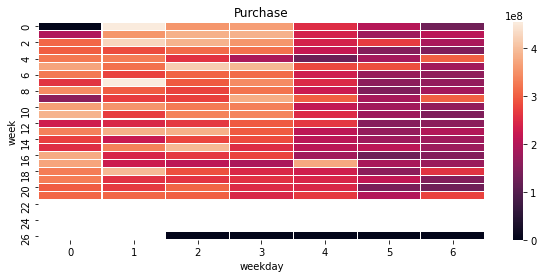

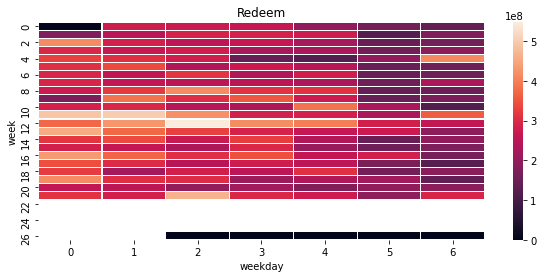

In [37]:
# 画出历史所有天的热力图

test = np.zeros((max(total_balance_1['week']) - min(total_balance_1['week']) + 1, 7))
test[total_balance_1['week'] - min(total_balance_1['week']), total_balance_1['weekday']] = total_balance_1['total_purchase_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Purchase")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

test = np.zeros((max(total_balance_1['week']) - min(total_balance_1['week']) + 1, 7))
test[total_balance_1['week'] - min(total_balance_1['week']), total_balance_1['weekday']] = total_balance_1['total_redeem_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Redeem")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

In [38]:
# 对于热力图中异常点的数据分析.1

total_balance_1[(total_balance_1['week'] == 4 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 6)]

date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
307 2014-05-04         303087562.0       413222034.0    4      5  2014    18   

     weekday  
307        6

In [39]:
# 对于热力图中异常点的数据分析.2

total_balance_1[(total_balance_1['week'] == 12 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 2)]

date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
359 2014-06-25         264663201.0       547295931.0   25      6  2014    26   

     weekday  
359        2

## 五、对于节假期的分析

In [40]:
# 获取节假日的数据

qingming = total_balance[(total_balance['date'] >= datetime.datetime(2014,4,5)) & (total_balance['date'] < datetime.datetime(2014,4,8))]
labour = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,1)) & (total_balance['date'] < datetime.datetime(2014,5,4))]
duanwu = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,31)) & (total_balance['date'] < datetime.datetime(2014,6,3))]
data618 = total_balance[(total_balance['date'] >= datetime.datetime(2014,6,10)) & (total_balance['date'] < datetime.datetime(2014,6,20))]

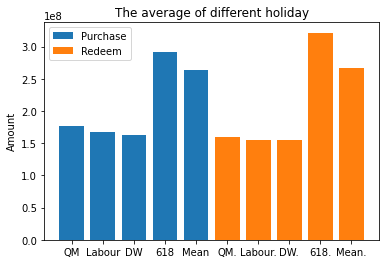

In [41]:
# 画出节假日与平时的均值

fig = plt.figure()
index_list = ['QM','Labour','DW','618','Mean']
label_list = [np.mean(qingming['total_purchase_amt']), np.mean(labour['total_purchase_amt']),np.mean(duanwu['total_purchase_amt']),np.mean(data618['total_purchase_amt']),np.mean(total_balance_1['total_purchase_amt'])]
plt.bar(index_list, label_list, label="Purchase")

index_list = ['QM.','Labour.','DW.','618.','Mean.']
label_list = [np.mean(qingming['total_redeem_amt']), np.mean(labour['total_redeem_amt']),np.mean(duanwu['total_redeem_amt']),np.mean(data618['total_redeem_amt']),np.mean(total_balance_1['total_redeem_amt'])]
plt.bar(index_list, label_list, label="Redeem")
plt.title("The average of different holiday")
plt.ylabel("Amount")
plt.legend()
plt.show()

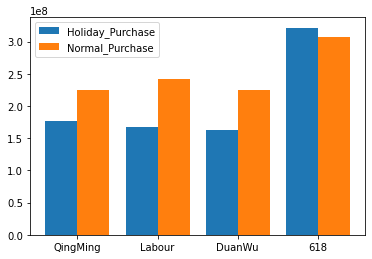

In [42]:
# 画出节假日购买量与其所处翌日的对比

import numpy as np
import matplotlib.pyplot as plt
size = 4
x = np.arange(size)

total_width, n = 0.8, 2    
width = total_width / n
x = x - (total_width - width) / 2

a = [176250006, 167825284, 162844282,321591063]
b = [225337516, 241859315, 225337516,307635449]

plt.bar(x, a,  width=width, label='Holiday_Purchase')
plt.bar(x + width, b, width=width, label='Normal_Purchase')
plt.xticks(x + width / 2, ('QingMing', 'Labour', 'DuanWu', '618'))
plt.legend()
plt.show()

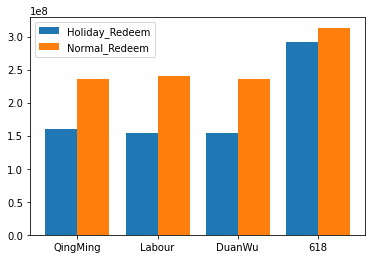

In [43]:
# 画出节假日赎回量与其所处翌日的对比

import numpy as np
import matplotlib.pyplot as plt
size = 4
x = np.arange(size)

total_width, n = 0.8, 2     
width = total_width / n
x = x - (total_width - width) / 2

a = [159914308, 154717620, 154366940,291016763]
b = [235439685, 240364238, 235439685,313310347]

plt.bar(x, a,  width=width, label='Holiday_Redeem')
plt.bar(x + width, b, width=width, label='Normal_Redeem')
plt.xticks(x + width / 2, ('QingMing', 'Labour', 'DuanWu', '618'))
plt.legend()
plt.show()

## 六、对于节假日周边日期的分析

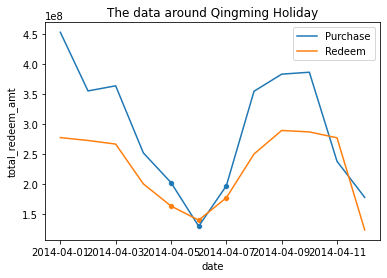

In [44]:
# 画出清明节与周边日期的时序图

qingming_around = total_balance[(total_balance['date'] >= datetime.datetime(2014,4,1)) & (total_balance['date'] < datetime.datetime(2014,4,13))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=qingming_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=qingming_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=qingming, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=qingming, ax=ax)
plt.title("The data around Qingming Holiday")
ax.legend()

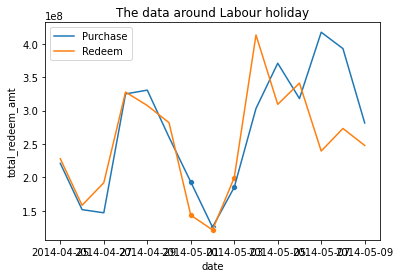

In [45]:
# 画出劳动节与周边日期的时序图

labour_around = total_balance[(total_balance['date'] >= datetime.datetime(2014,4,25)) & (total_balance['date'] < datetime.datetime(2014,5,10))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=labour_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=labour_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=labour, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=labour, ax=ax)
plt.title("The data around Labour holiday")
ax.legend()

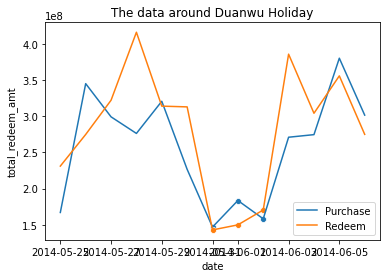

In [46]:
# # 画出端午节与周边日期的时序图

duanwu_around = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,25)) & (total_balance['date'] < datetime.datetime(2014,6,7))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=duanwu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=duanwu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=duanwu, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=duanwu, ax=ax)
plt.title("The data around Duanwu Holiday")
ax.legend()

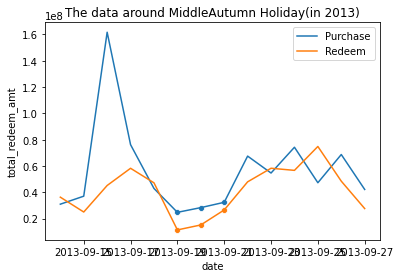

In [47]:
# 画出中秋与周边日期的时序图

zhongqiu = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,19)) & (total_balance['date'] < datetime.datetime(2013,9,22))]
zhongqiu_around = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,14)) & (total_balance['date'] < datetime.datetime(2013,9,28))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=zhongqiu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=zhongqiu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=zhongqiu, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=zhongqiu, ax=ax)
plt.title("The data around MiddleAutumn Holiday(in 2013)")
ax.legend()

## 七、对于异常值的分析

Text(0.5, 1.0, 'The abnormal value of total purchase')

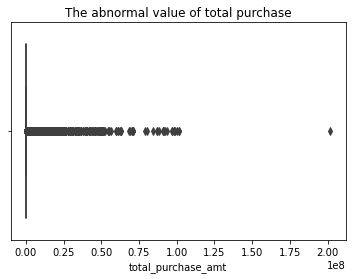

In [48]:
# 画出用户交易纪录的箱型图

sns.boxplot(data_balance['total_purchase_amt'])
plt.title("The abnormal value of total purchase")

In [49]:
# 对于购买2e8的用户的交易行为分析

data_balance[data_balance['user_id'] == 14592].sort_values(by = 'total_redeem_amt',axis = 0,ascending = False).head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
1453311    14592     20131104  99457728         0           201768328   
1453388    14592     20140616         0  98964529             1966014   
1453227    14592     20131226    367063  98296082               17369   
1453313    14592     20131105  97458675  99457728             4899446   
1453355    14592     20140617         0         0              339679   

         direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
1453311            201768328         201275171             493157   
1453388              1953569                 0            1953569   
1453227                    0                 0                  0   
1453313              4899446           4899446                  0   
1453355               339679                 0             339679   

         total_redeem_amt  consume_amt  ...  category1  category2  category3  \
1453311         102310600            0  ...        NaN        NaN        NaN   
1453388         100930543            0  ...        NaN        NaN        NaN   
1453227          97946388            0  ...        NaN        NaN        NaN   
1453313           6898499            0  ...        NaN        NaN        NaN   
1453355            339679            0  ...        NaN        NaN        NaN   

         category4       date  day  month  year week  weekday  
1453311        NaN 2013-11-04    4     11  2013   45        0  
1453388        NaN 2014-06-16   16      6  2014   25        0  
1453227        NaN 2013-12-26   26     12  2013   52        3  
1453313        NaN 2013-11-05    5     11  2013   45        1  
1453355        NaN 2014-06-17   17      6  2014   25        1  

[5 rows x 24 columns]

`
1311 Bought 2E Seal 1E
1312        Seal 1E
1405 Bought 0.9E
1406        Seal 1E`

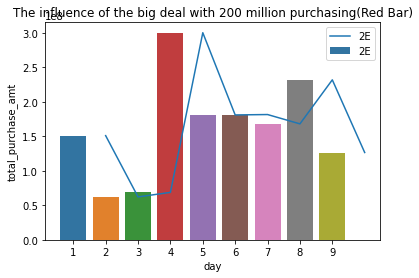

In [50]:
# 画出单笔交易为2e8的那天的总交易量及附近几天的交易量

e2 = total_balance[(total_balance['date'] >= datetime.datetime(2013,11,1)) & (total_balance['date'] < datetime.datetime(2013,11,10))]
ax = sns.barplot(x="day", y="total_purchase_amt", data=e2, label='2E')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=e2, label='2E')
plt.title("The influence of the big deal with 200 million purchasing(Red Bar)")
ax.legend()

Text(0.5, 1.0, 'The Biggest deal happend in each day')

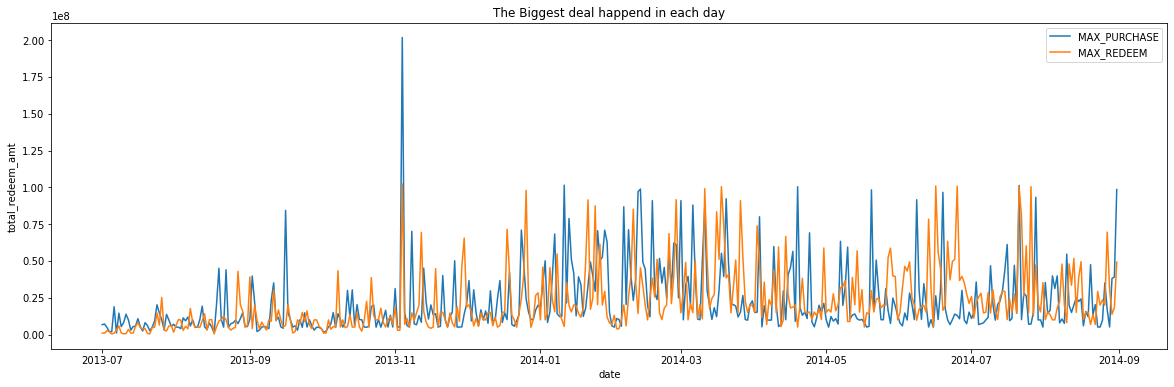

In [51]:
# 画出每日单笔最大交易的时序图

plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_REDEEM')
plt.title("The Biggest deal happend in each day")

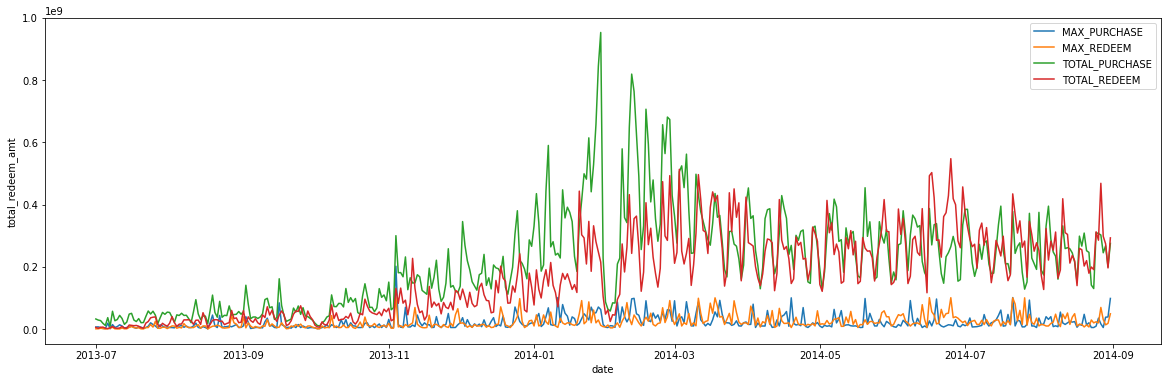

In [52]:
# 画出每日单笔最大交易以及总交易额的时序图

plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_REDEEM')
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).sum(), label='TOTAL_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).sum(), label='TOTAL_REDEEM')

Text(0.5, 1.0, 'The frequency of super big deal(larger than 100million) in each month')

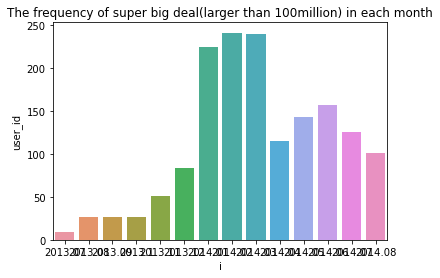

In [53]:
# 画出每个月大额交易的频次直方图

big_frequancy = data_balance[(data_balance['total_purchase_amt'] > 10000000) | (data_balance['total_redeem_amt'] > 10000000)][['month','year','user_id']].groupby(['year','month'], as_index=False).count()
big_frequancy['i'] = big_frequancy['year']  + big_frequancy['month'] / 100
ax = sns.barplot(x="i", y="user_id", data=big_frequancy)
plt.title("The frequency of super big deal(larger than 100million) in each month")

In [54]:
# 获取大额交易的数据集

data_balance['big_purchase'] = 0
data_balance.loc[data_balance['total_purchase_amt'] > 1000000, 'big_purchase'] = 1
data_balance['big_redeem'] = 0
data_balance.loc[data_balance['total_redeem_amt'] > 1000000, 'big_redeem'] = 1

In [55]:
# 对大额交易按每天做聚合操作

big_purchase = data_balance[data_balance['big_purchase'] == 1].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
small_purchase = data_balance[data_balance['big_purchase'] == 0].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
big_redeem = data_balance[data_balance['big_redeem'] == 1].groupby(['date'], as_index=False)['total_redeem_amt'].sum()
small_redeem = data_balance[data_balance['big_redeem'] == 0].groupby(['date'], as_index=False)['total_redeem_amt'].sum()

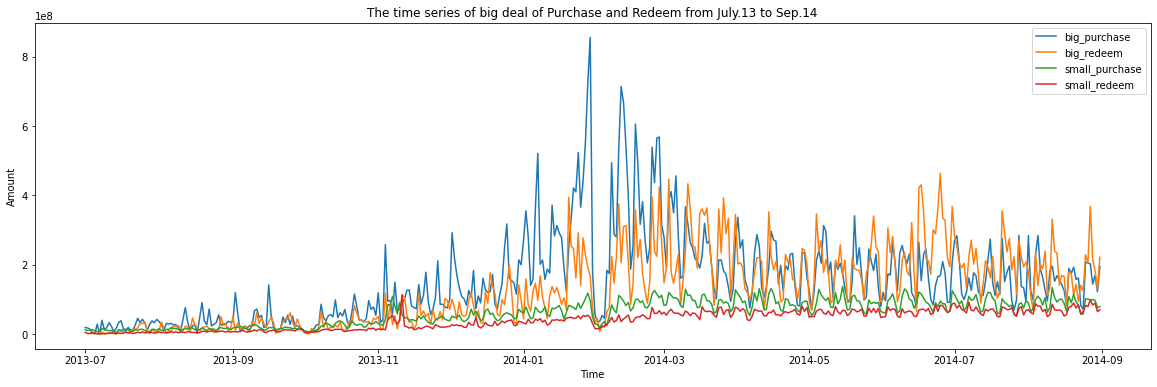

In [56]:
# 画出大额交易与小额交易的时序分布图

fig = plt.figure(figsize=(20,6))
plt.plot(big_purchase['date'], big_purchase['total_purchase_amt'],label='big_purchase')
plt.plot(big_redeem['date'], big_redeem['total_redeem_amt'],label='big_redeem')

plt.plot(small_purchase['date'], small_purchase['total_purchase_amt'],label='small_purchase')
plt.plot(small_redeem['date'], small_redeem['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big deal of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

Text(0.5, 1.0, 'SMALL REDEEM')

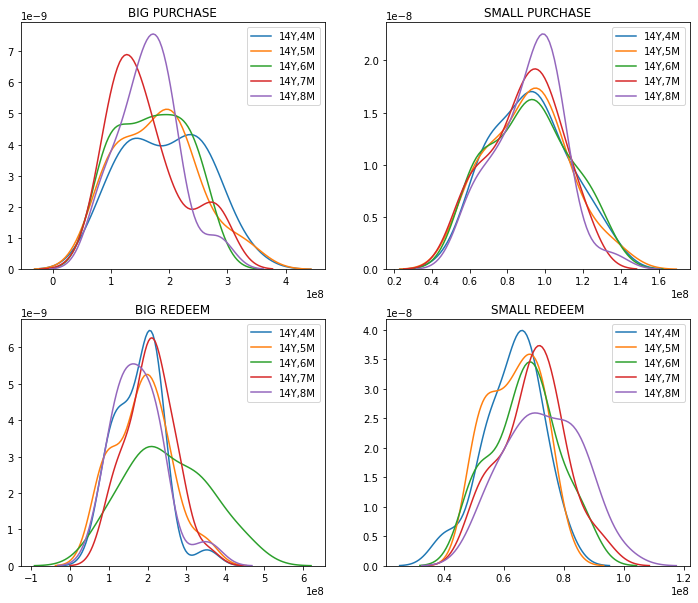

In [57]:
# 画出大额交易与小额交易的分布估计图

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for i in range(4, 9):
    sns.kdeplot(big_purchase[(big_purchase['date'] >= datetime.datetime(2014,i,1)) & (big_purchase['date'] < datetime.datetime(2014,i+1,1))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG PURCHASE')

plt.subplot(2,2,2)
for i in range(4, 9):
    sns.kdeplot(small_purchase[(small_purchase['date'] >= datetime.datetime(2014,i,1)) & (small_purchase['date'] < datetime.datetime(2014,i+1,1))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL PURCHASE')

plt.subplot(2,2,3)
for i in range(4, 9):
    sns.kdeplot(big_redeem[(big_redeem['date'] >= datetime.datetime(2014,i,1)) & (big_redeem['date'] < datetime.datetime(2014,i+1,1))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG REDEEM')

plt.subplot(2,2,4)
for i in range(4, 9):
    sns.kdeplot(small_redeem[(small_redeem['date'] >= datetime.datetime(2014,i,1)) & (small_redeem['date'] < datetime.datetime(2014,i+1,1))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL REDEEM')

In [58]:
# 添加时间戳

big_purchase['weekday'] = big_purchase['date'].dt.weekday
small_purchase['weekday'] = small_purchase['date'].dt.weekday
big_redeem['weekday'] = big_redeem['date'].dt.weekday
small_redeem['weekday'] = small_redeem['date'].dt.weekday

Text(0.5, 1.0, 'SMALL REDEEM')

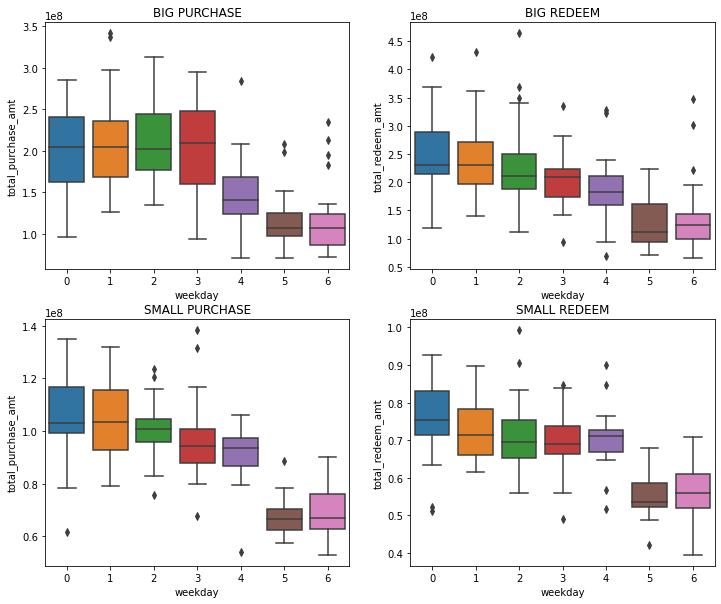

In [59]:
# 分析大额小额的翌日分布

plt.figure(figsize=(12, 10))

ax = plt.subplot(2,2,1)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=big_purchase[big_purchase['date'] >= datetime.datetime(2014,4,1)])
plt.title('BIG PURCHASE')

ax = plt.subplot(2,2,2)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=big_redeem[big_redeem['date'] >= datetime.datetime(2014,4,1)])
plt.title('BIG REDEEM')

ax = plt.subplot(2,2,3)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=small_purchase[small_purchase['date'] >= datetime.datetime(2014,4,1)])
plt.title('SMALL PURCHASE')

ax = plt.subplot(2,2,4)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=small_redeem[small_redeem['date'] >= datetime.datetime(2014,4,1)])
plt.title('SMALL REDEEM')

## 八、分析用户交易纪录表中其他变量

In [60]:
# 截断数据集

data_balance_1 = data_balance[data_balance['date'] > datetime.datetime(2014,4,1)]

Text(0.5, 1.0, 'The coleration between each feature in User_Balance_Table')

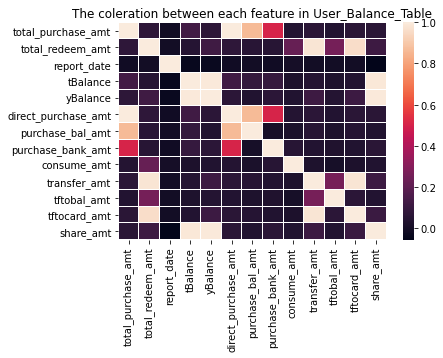

In [61]:
# 画出用户交易纪录表中其他变量与标签的相关性图

feature = ['total_purchase_amt','total_redeem_amt', 'report_date', 'tBalance', 'yBalance', 
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
        'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt']

sns.heatmap(data_balance_1[feature].corr(), linewidths = 0.05)   
plt.title("The coleration between each feature in User_Balance_Table")

## 九、对于银行及支付宝利率的分析

In [62]:
# 读取银行利率并添加时间戳

bank = pd.read_csv(dataset_path + "mfd_bank_shibor.csv")
bank = bank.rename(columns = {'mfd_date': 'date'})
bank_features = [x for x in bank.columns if x not in ['date']]
bank['date'] = pd.to_datetime(bank['date'], format= "%Y%m%d")
bank['day'] = bank['date'].dt.day
bank['month'] = bank['date'].dt.month
bank['year'] = bank['date'].dt.year
bank['week'] = bank['date'].dt.week
bank['weekday'] = bank['date'].dt.weekday

In [63]:
# 读取支付宝利率并添加时间戳

share = pd.read_csv(dataset_path + 'mfd_day_share_interest.csv')
share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

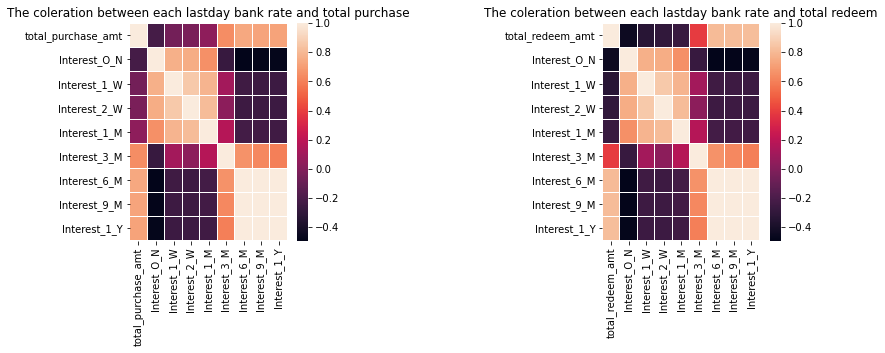

In [64]:
# 画出上一天银行及支付宝利率与标签的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each lastday bank rate and total purchase")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each lastday bank rate and total redeem")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

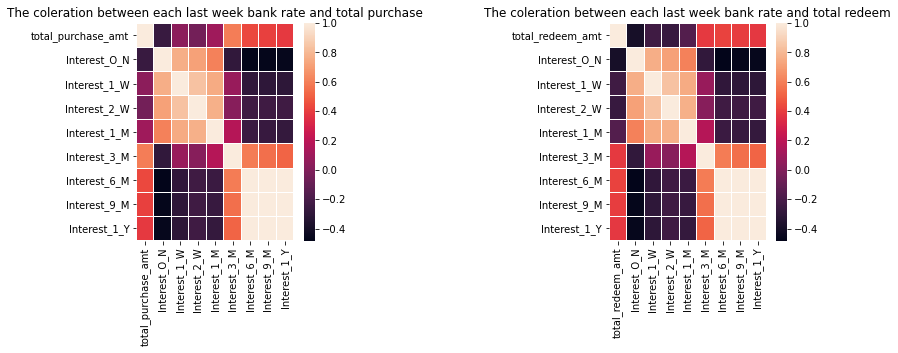

In [65]:
# 画出上一星期银行及支付宝利率与标签的相关性图

bank['last_week'] = bank['week'] + 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each last week bank rate and total purchase")
temp = pd.merge(bank[['last_week','weekday']+bank_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each last week bank rate and total redeem")
temp = pd.merge(bank[['last_week','weekday']+bank_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05) 

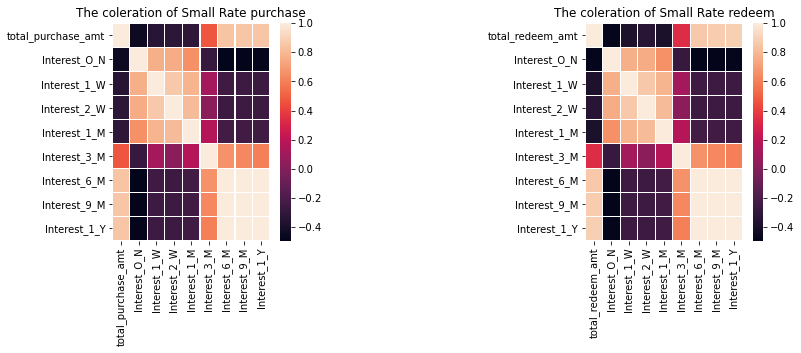

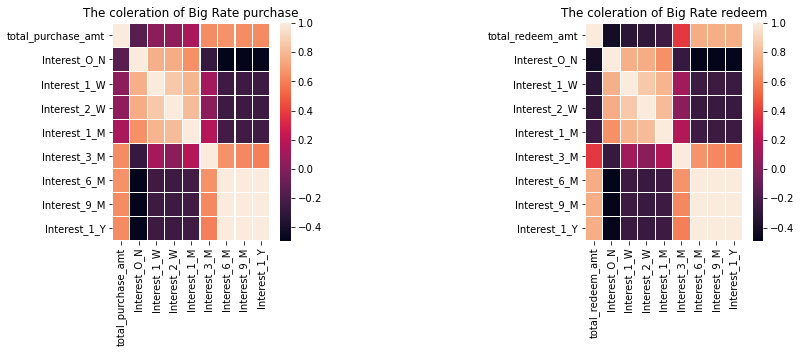

In [66]:
# 分别画出上一星期银行及支付宝利率与大额小额数据的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration of Small Rate purchase")
temp = pd.merge(bank[['last_date']+bank_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration of Small Rate redeem")
temp = pd.merge(bank[['last_date']+bank_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration of Big Rate purchase")
temp = pd.merge(bank[['last_date']+bank_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration of Big Rate redeem")
temp = pd.merge(bank[['last_date']+bank_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

Text(0, 0.5, 'Rate')

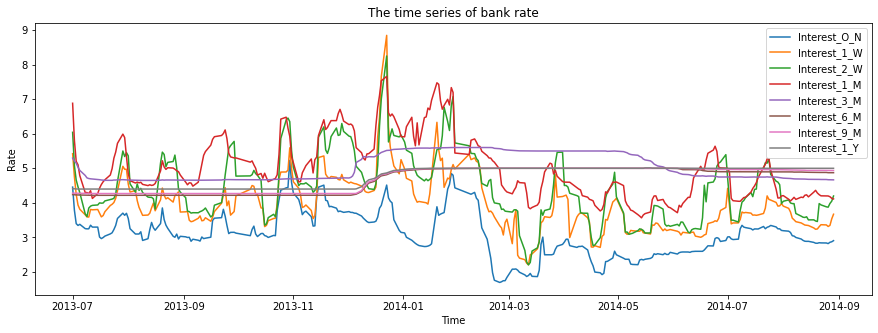

In [67]:
# 画出银行利率的时序图

plt.figure(figsize=(15,5))
for i in bank_features:
    plt.plot(bank['date'], bank[[i]] ,label=i)
plt.legend()
plt.title("The time series of bank rate")
plt.xlabel("Time")
plt.ylabel("Rate")

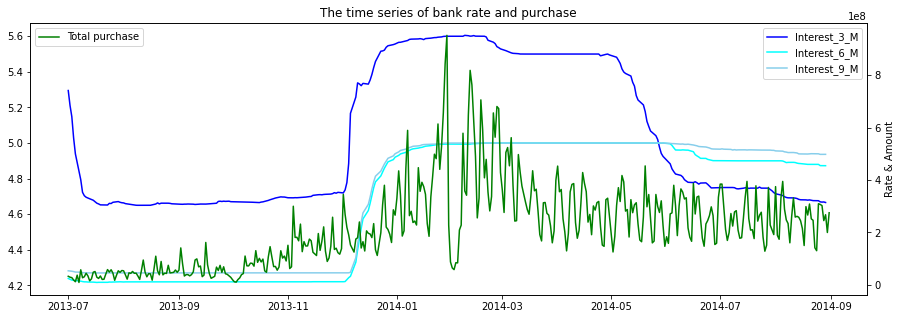

In [68]:
# 画出部分银行利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'skyblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")

plt.legend(loc=2)
plt.title("The time series of bank rate and purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")
plt.show()


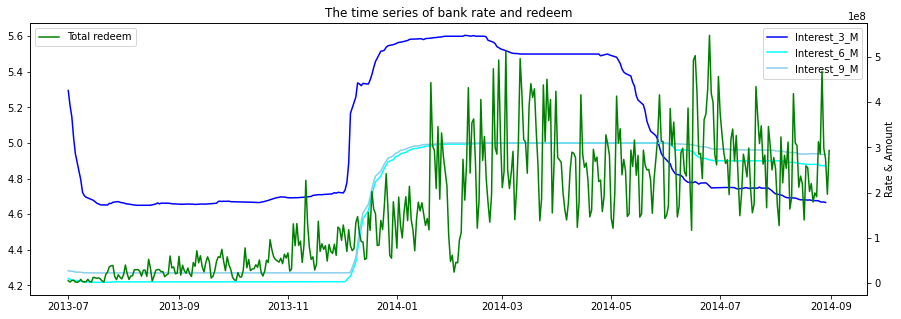

In [69]:
# 画出部分银行利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'skyblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")

plt.legend(loc=2)
plt.title("The time series of bank rate and redeem")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()


## The information for Share rate

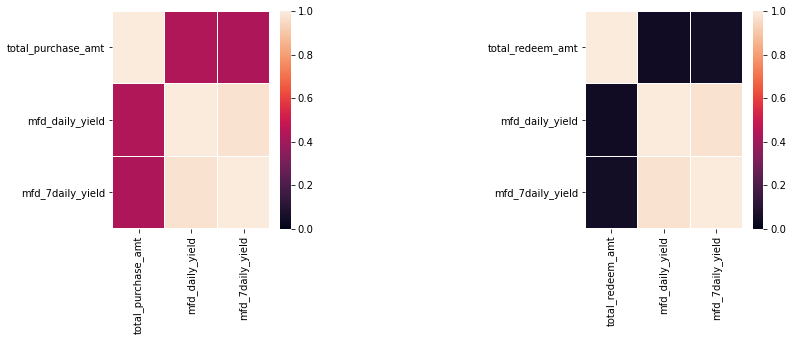

In [70]:
# 画出支付宝利率与标签的相关性图

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  

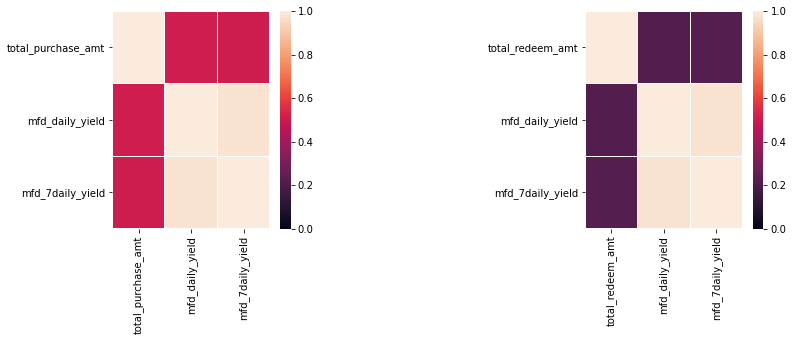

In [71]:
# 画出银行利率与标签的相关性图

share['last_week'] = share['week'] + 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0) 

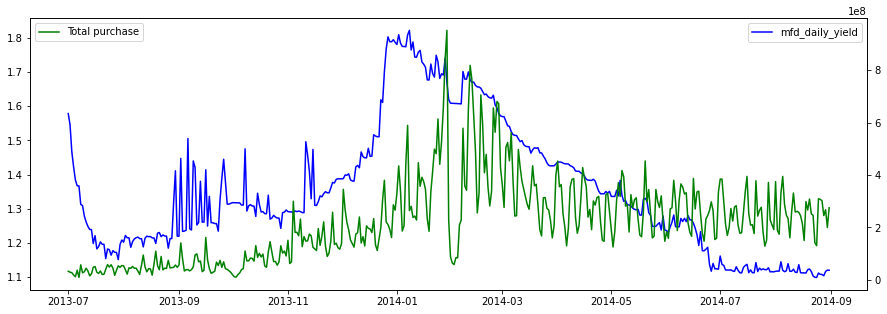

In [72]:
# 画出支付宝利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],'b',label=i)
    break
plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")
plt.legend(loc=2)
plt.show()

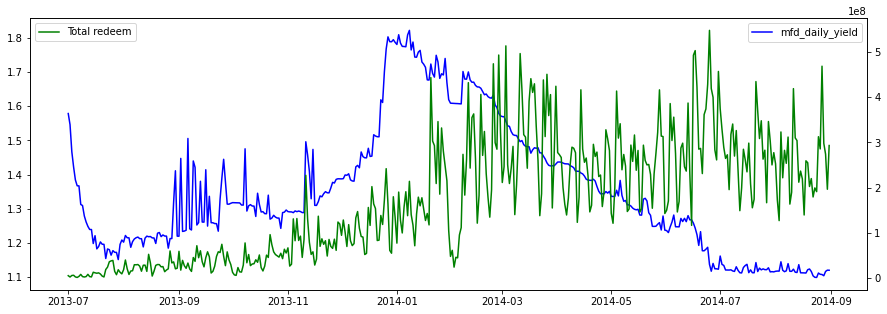

In [73]:
# 画出支付宝利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],'b',label=i)
    break
plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")
plt.legend(loc=2)
plt.show()

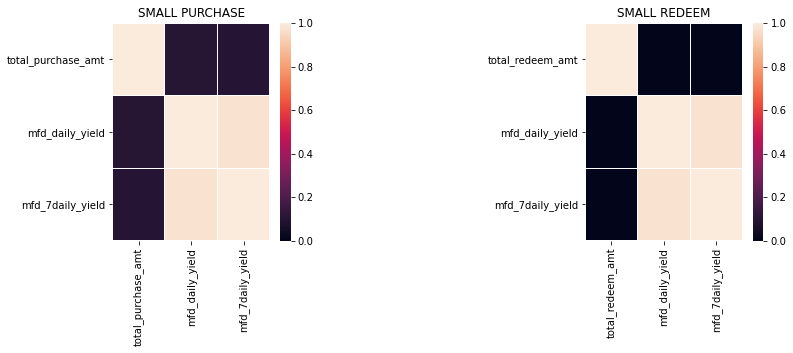

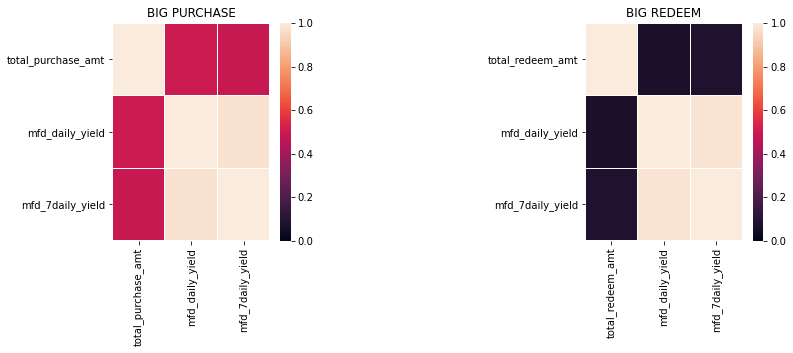

In [74]:
# 画出大额小额数据与支付宝利率的相关性图

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  
plt.title("SMALL PURCHASE")
plt.subplot(1,3,3)
plt.title("SMALL REDEEM")
temp = pd.merge(share[['last_date']+share_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("BIG PURCHASE")
temp = pd.merge(share[['last_date']+share_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  
plt.subplot(1,3,3)
plt.title("BIG REDEEM")
temp = pd.merge(share[['last_date']+share_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  

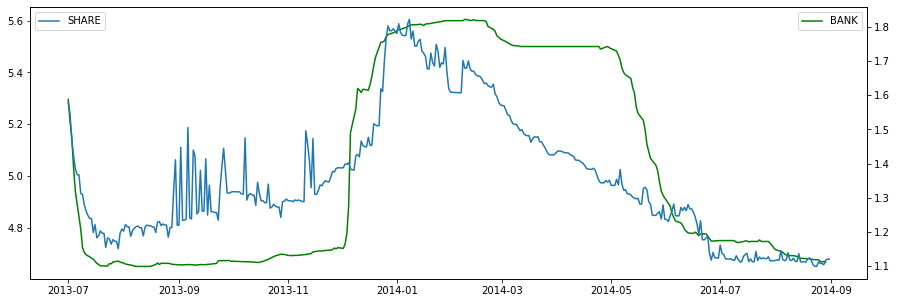

In [75]:
# 画出银行利率与支付宝利率的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],c='g',label= 'BANK')

plt.legend()
ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],label='SHARE')
plt.legend(loc=2)
plt.show()

## 八、分析大小额用户

In [76]:
# 获得大额用户的集合

temp = data_balance[(data_balance['total_purchase_amt'] >= 1000000) | (data_balance['total_redeem_amt'] >= 1000000)]
big_users_set = set(temp[temp['date'] >= datetime.datetime(2014,4,1)]['user_id'])

In [77]:
usr_sum = int(len(big_users_set)/max(data_balance['user_id'])*100)
print("大额用户{0}个，占总数的{1}%".format(len(big_users_set),usr_sum))

大额用户3903个，占总数的13%


In [78]:
# 标记大额用户
data_balance['big_user'] = 0
data_balance.loc[data_balance['user_id'].isin(big_users_set), 'big_user'] = 1

In [79]:
# 统计大额用户与小额用户的日总交易额的区别

total_balance_bigNsmall = data_balance.groupby(['date','big_user'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

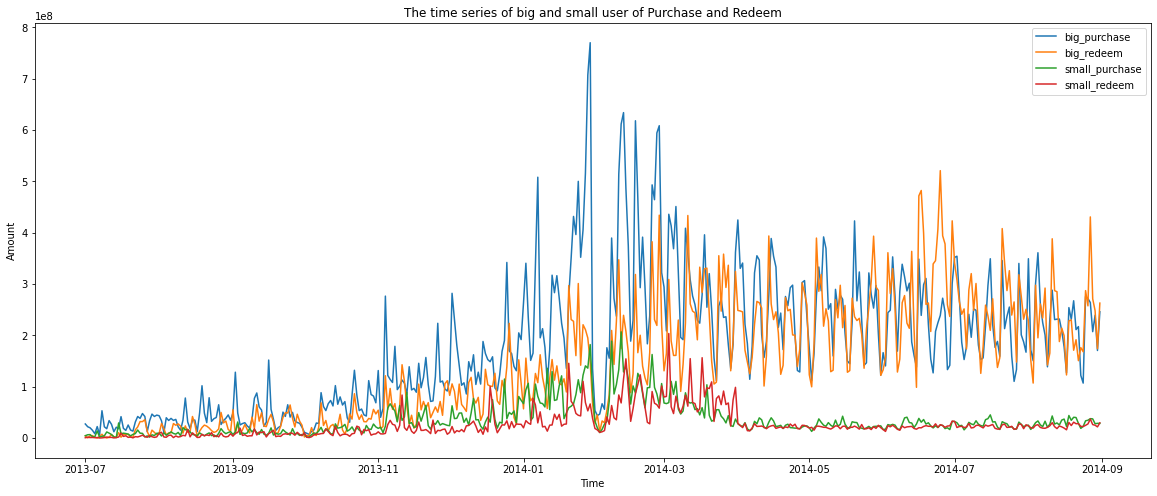

In [80]:
# 画出大额用户与小额用户交易的日总交易量图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_purchase_amt'],label='big_purchase')
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_redeem_amt'],label='big_redeem')

plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_purchase_amt'],label='small_purchase')
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [81]:
# 统计大额小额用户购买量占比

np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_purchase_amt']) / np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_purchase_amt'])

5.1456178397775805

In [82]:
# 统计大额小额用户赎回量占比

np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_redeem_amt']) / np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_redeem_amt'])

5.422141272341089

## 九、分析用户的交易频次

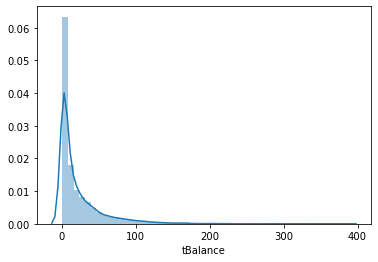

In [83]:
# 画出非0交易的分布图

frequency = data_balance[(data_balance['direct_purchase_amt'] != 0) | (data_balance['total_redeem_amt'] != 0)][['user_id','tBalance']].groupby('user_id', as_index=False).count()
sns.distplot(frequency['tBalance'])

In [84]:
# 获取频繁交易用户集合

hot_users_set = set(frequency[frequency['tBalance'] > 30]['user_id'])

In [85]:
# 获取频繁用户的交易纪录

data_balance['is_hot_users'] = 0
data_balance.loc[data_balance['user_id'].isin(hot_users_set) , 'is_hot_users'] = 1

In [86]:
# 统计频繁用户与非频繁用户的日总交易额的区别

total_balance_hotNcold = data_balance.groupby(['date','is_hot_users'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

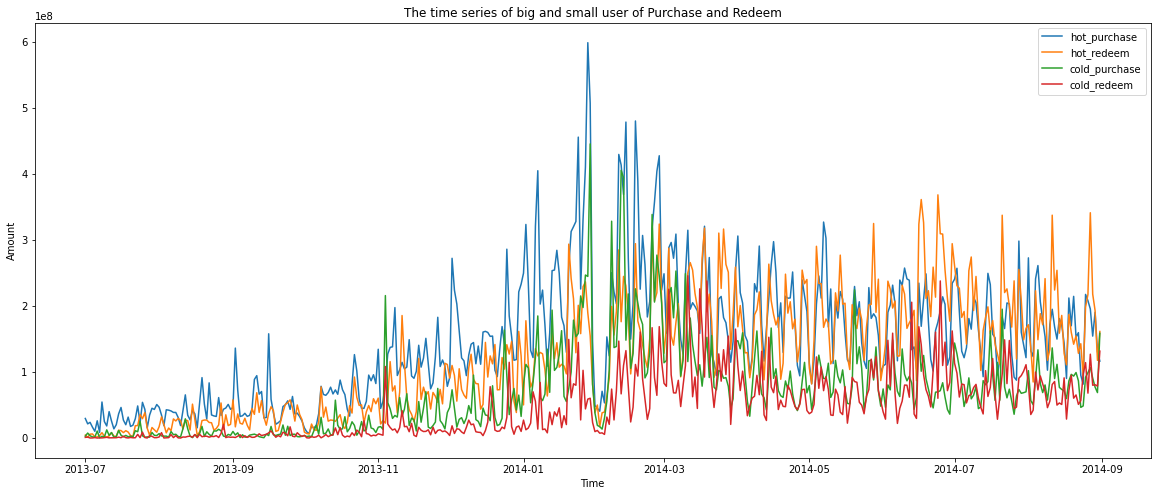

In [87]:
# 绘制频繁用户与非频繁用户总购买赎回量的时序图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['total_purchase_amt'],label='hot_purchase')
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['total_redeem_amt'],label='hot_redeem')

plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['total_purchase_amt'],label='cold_purchase')
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['total_redeem_amt'],label='cold_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

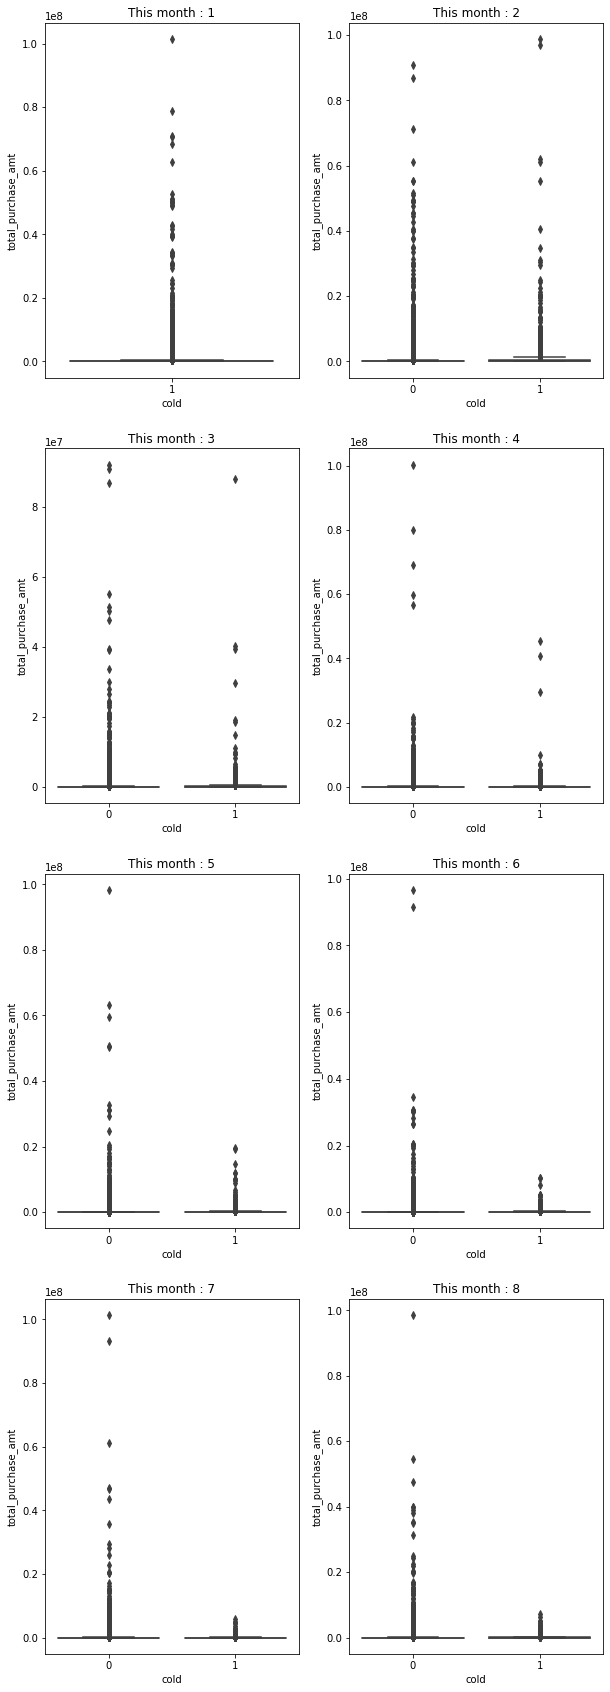

In [88]:
# 画出冷启动用户与老用户交易的箱型图

temp = data_balance[['year','month','user_id','total_purchase_amt','total_redeem_amt']].groupby(['year','month','user_id'], as_index=False).sum()
user_old_set = set()
plt.figure(figsize=(10,30))
for i in range(1, 9):
    newset = set(temp[(temp['year'] == 2014) & (temp['month'] == i)]['user_id'])
    this_month = data_balance[(data_balance['year'] == 2014) & (data_balance['month'] == i)]
    this_month['cold'] = 0
    this_month.loc[this_month['user_id'].isin(newset - user_old_set), 'cold'] = 1
    plt.subplot(4,2,i)
    plt.title('This month : ' + str(i))
    sns.boxplot(x="cold", y="total_purchase_amt" , data=this_month[(this_month['direct_purchase_amt'] != 0) | (this_month['total_redeem_amt'] != 0)])
    user_old_set = user_old_set | newset
plt.show()

## 十、分析用户的其他属性

In [89]:
# 用户的其他属性

users.head()

user_id  sex     city constellation
0        2    1  6411949           狮子座
1       12    1  6412149           摩羯座
2       22    1  6411949           双子座
3       23    1  6411949           双鱼座
4       25    1  6481949           双鱼座

In [90]:
# 添加城市、星座、性别

data_balance = pd.merge(data_balance, users, on='user_id')

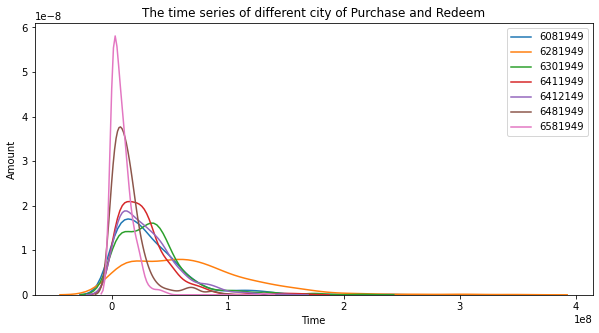

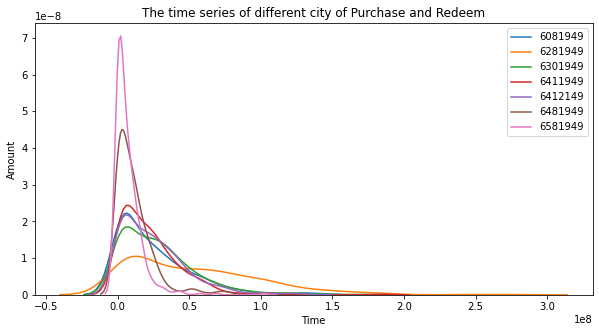

In [91]:
# 统计每个城市用户的日总交易额的区别并绘制分布估计图

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of different city of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of different city of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

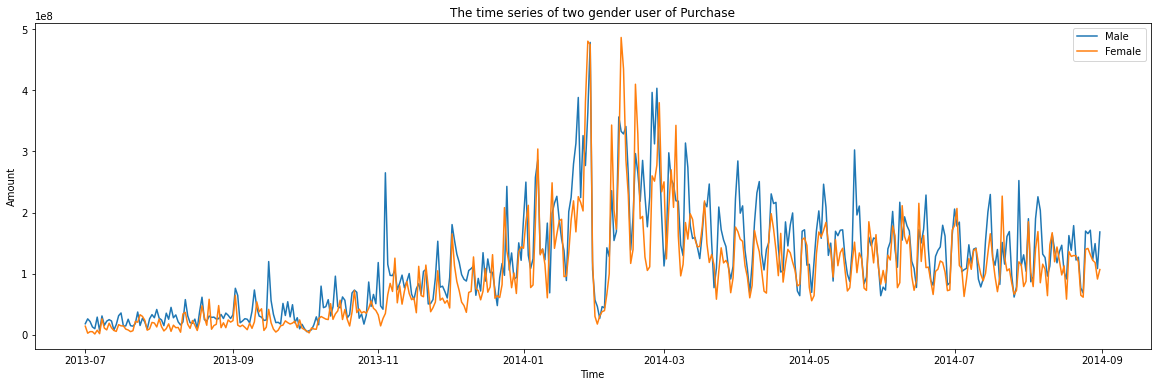

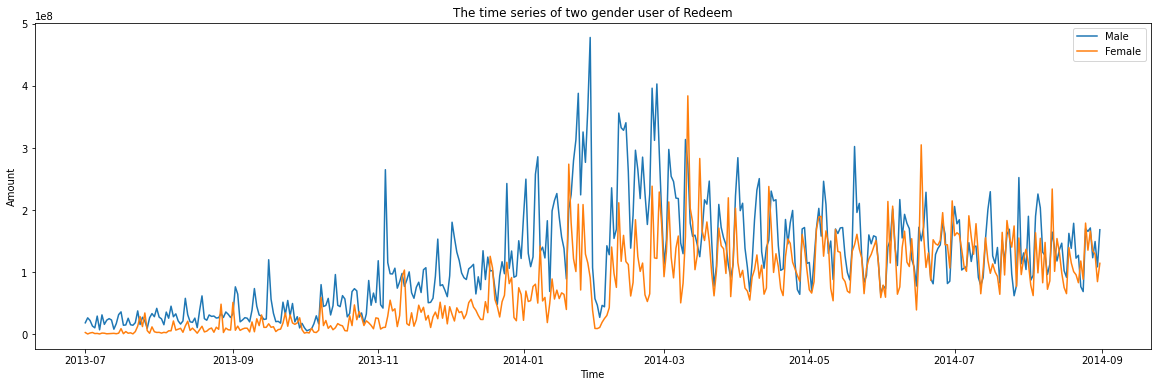

In [92]:
# 统计每个性别用户的日总交易额的区别，并绘制时序图

temp = data_balance.groupby(['date','sex'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

fig = plt.figure(figsize=(20,6))
plt.plot(temp[temp['sex'] == 1]['date'], temp[temp['sex'] == 1]['total_purchase_amt'],label='Male')
plt.plot(temp[temp['sex'] == 0]['date'], temp[temp['sex'] == 0]['total_purchase_amt'],label='Female')
plt.legend(loc='best')
plt.title("The time series of two gender user of Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(20,6))
plt.plot(temp[temp['sex'] == 1]['date'], temp[temp['sex'] == 1]['total_purchase_amt'],label='Male')
plt.plot(temp[temp['sex'] == 0]['date'], temp[temp['sex'] == 0]['total_redeem_amt'],label='Female')
plt.legend(loc='best')
plt.title("The time series of two gender user of Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

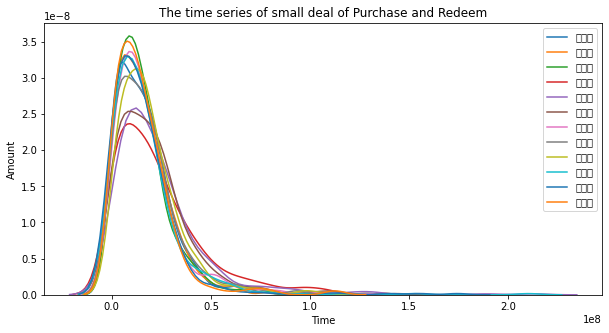

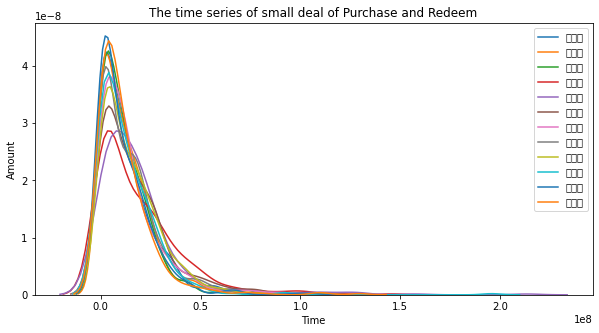

In [93]:
# 统计每个星座用户的日总交易额的区别 并绘制分布估计图

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['constellation']):
    temp = data_balance.groupby(['date','constellation'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['constellation'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of small deal of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['constellation']):
    temp = data_balance.groupby(['date','constellation'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['constellation'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of small deal of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

##  十一、其他分析

In [94]:
# 统计每个性别用户的日总交易额的区别

temp = data_balance.groupby(['date'], as_index=False)['direct_purchase_amt','share_amt'].sum()

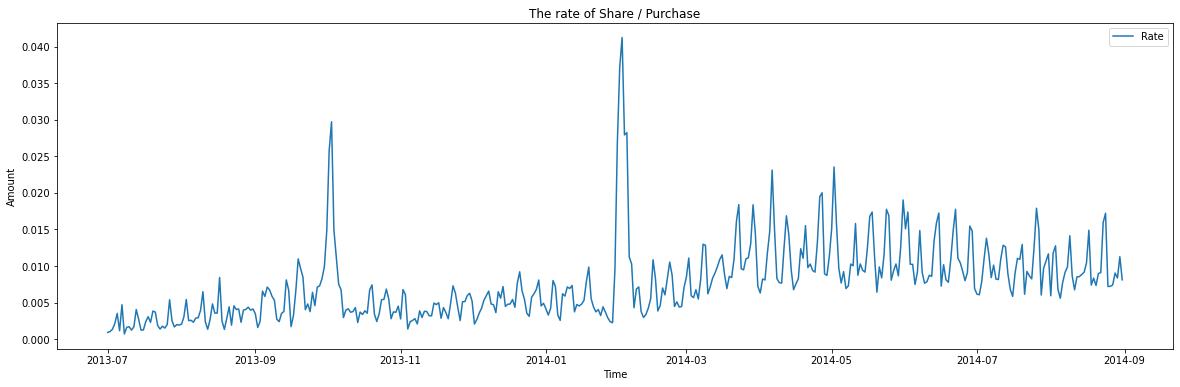

In [95]:
# 画出每日利息的增长/直接购买量的时序图

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'],  temp['share_amt'] / temp['direct_purchase_amt'] ,label='Rate')
plt.legend(loc='best')
plt.title("The rate of Share / Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [96]:
# 加载支付宝利率数据
share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

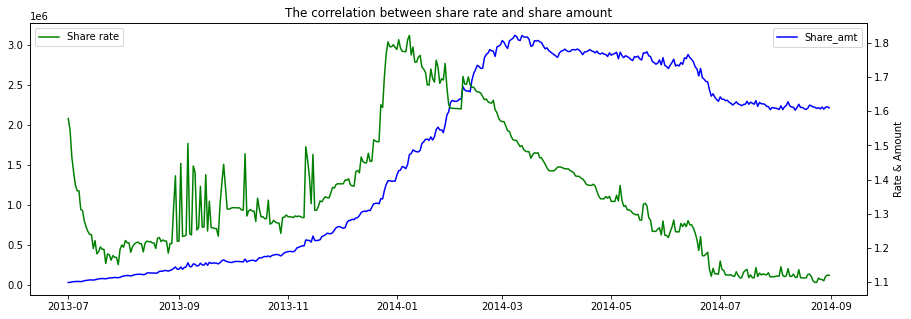

In [97]:
# 绘制支付宝利率与交易额的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'],'b',label="Share_amt")
plt.legend()

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Share rate")

plt.legend(loc=2)
plt.title("The correlation between share rate and share amount")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

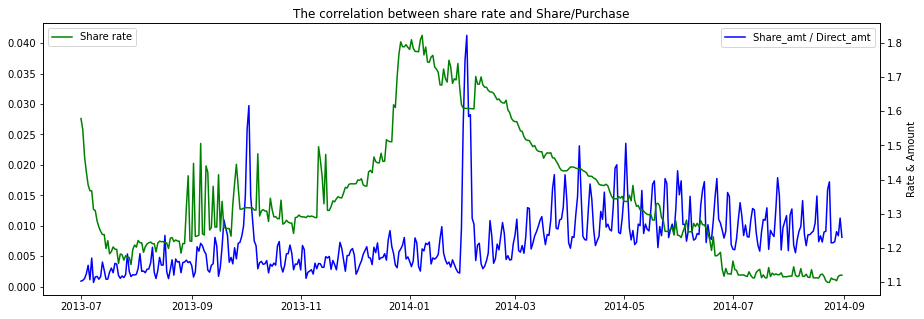

In [98]:
# 支付宝利率与每日利息的增长/直接购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'] / temp['direct_purchase_amt'],'b',label="Share_amt / Direct_amt")
plt.legend()

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Share rate")

plt.legend(loc=2)
plt.title("The correlation between share rate and Share/Purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

In [99]:
# 聚合两种不同购买方式

temp = data_balance.groupby(['date'], as_index=False)['purchase_bal_amt','purchase_bank_amt'].sum()

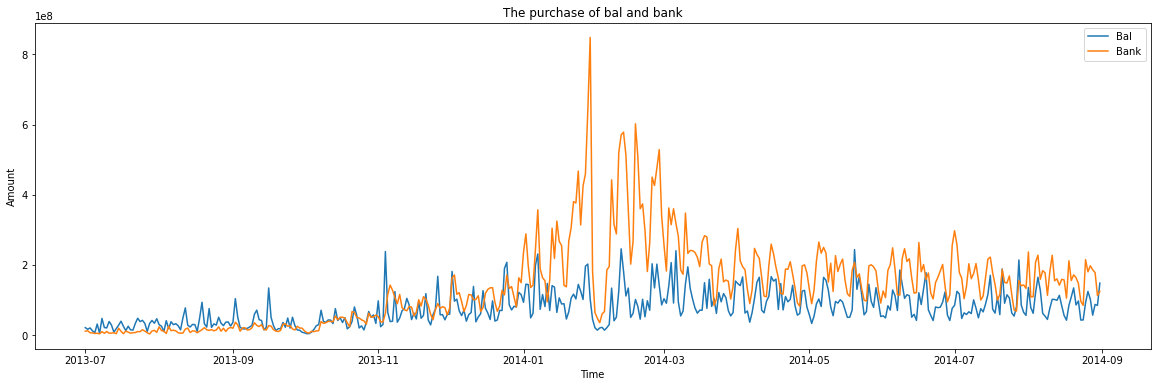

In [100]:
# 画出不同购买方式日购买量的时序图

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['purchase_bal_amt'],label='Bal')
plt.plot(temp['date'], temp['purchase_bank_amt'],label='Bank')
plt.legend(loc='best')
plt.title("The purchase of bal and bank")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

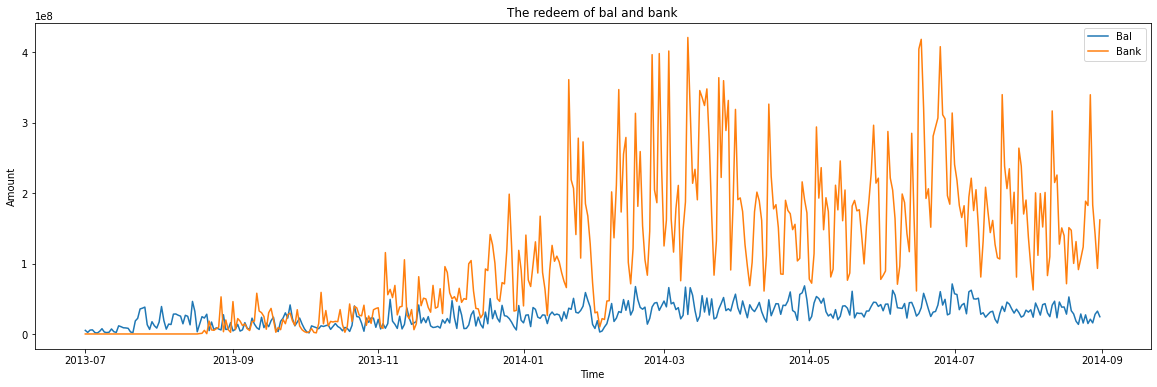

In [101]:
# 画出不同赎回方式日赎回量的时序图

temp = data_balance.groupby(['date'], as_index=False)['tftobal_amt','tftocard_amt'].sum()
fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['tftobal_amt'],label='Bal')
plt.plot(temp['date'], temp['tftocard_amt'],label='Bank')
plt.legend(loc='best')
plt.title("The redeem of bal and bank")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()